In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df1 = pd.read_csv('C:\\Users\\Acer\\Desktop\\Deep Learning\\KaggleCompetition-HousePricePrediction\\train.csv')
df2 = pd.read_csv('C:\\Users\\Acer\\Desktop\\Deep Learning\\KaggleCompetition-HousePricePrediction\\test.csv')


In [4]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
'''Here we are going to append the train and test dataset and then we will perform data handling and since
the test dataset has no SalesPrice column,we will make and add one to the test set'''


'Here we are going to append the train and test dataset and then we will perform data handling and since\nthe test dataset has no SalesPrice column,we will make and add one to the test set'

In [6]:
if 'SalePrice' not in df2.columns:
  df2['SalePrice'] = 0

df = pd.concat([df1,df2],axis = 0)



In [7]:
df.shape

(2919, 81)

In [8]:
df = df.set_index('Id')

In [9]:
df.shape

(2919, 80)

Data Handling Process


In [10]:
#handling  values with 0

'''zero_counts = df.eq(0).sum()
columns_with_many_zeros = zero_counts[zero_counts > 2000].index.tolist()

print(columns_with_many_zeros)
#Replacing Zeros with median
df.drop(columns = columns_with_many_zeros,inplace = True)
df.shape'''
#output: columns = ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
#Remove LowQualFinSF,3SsnPorch,ScreenPorch,PoolArea,PoolQC,
#BsmtHalfBath,FullBath is for categorical

'zero_counts = df.eq(0).sum()\ncolumns_with_many_zeros = zero_counts[zero_counts > 2000].index.tolist()\n\nprint(columns_with_many_zeros)\n#Replacing Zeros with median\ndf.drop(columns = columns_with_many_zeros,inplace = True)\ndf.shape'

In [11]:
dff = df.drop(['LowQualFinSF','3SsnPorch','ScreenPorch','PoolArea','PoolQC'],axis=1)

In [12]:
dff.shape

(2919, 75)

In [13]:
'''
col_with_zero = ['MasVnrArea', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'WoodDeckSF' ]
for col in col_with_zero:
    df[col] = df[col].replace(0,df[col].median())'''

"\ncol_with_zero = ['MasVnrArea', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'WoodDeckSF' ]\nfor col in col_with_zero:\n    df[col] = df[col].replace(0,df[col].median())"

In [14]:
#checking null values
df_null  = dff[dff.isnull().sum()[dff.isnull().sum()>0].index]
df_null.head()
#the code above has extracted the columns containing the null values

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,Attchd,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,Attchd,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,Attchd,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,WD
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,Detchd,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,WD
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,Attchd,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,WD


<Axes: ylabel='Id'>

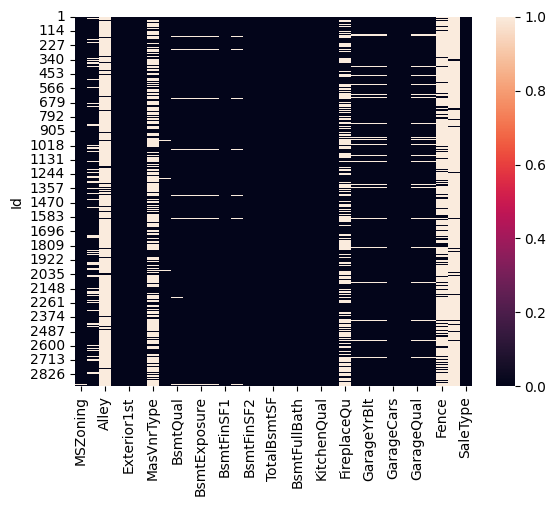

In [15]:
#Now to we will visualize the null values
sns.heatmap(df_null.isnull())

In [16]:

# Calculate the columns to be dropped
cols_to_drop = dff.columns[dff.isnull().sum() > 1200]

# Drop the columns
dff1 = dff.drop(columns=cols_to_drop)

In [17]:
    
#Finding unique values 
def print_unq_val(dff1):
    for col in dff1:
        if dff1[col].dtypes == 'object':
            print(col,":",dff1[col].unique())
print_unq_val(dff1)            

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
Street : ['Pave' 'Grvl']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa' nan]
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st : ['VinylS

In [18]:
dff1.isna().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 70, dtype: int64

In [19]:
#filling in missing values for numerical column
Mode_columns = ['GarageCars', 'GarageYrBlt','LotFrontage']
Mean_columns = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
                'TotalBsmtSF', 'GarageArea']

for i in Mode_columns:
    dff1[i] = dff1[i].fillna(dff1[i].mode()[0])

for i in Mean_columns:
    dff1[i] = dff1[i].fillna(np.round(dff1[i].mean()))



In [20]:
#Filling in missing values for object column
for col in dff1.select_dtypes(include='object'):
    dff1[col].fillna(dff1[col].mode()[0], inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_5984\1378749487.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dff1[col].fillna(dff1[col].mode()[0], inplace=True)


In [21]:
dff1.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 70, dtype: int64

In [22]:
#One hot encoding
'''df_en = df[df.select_dtypes(include = ['object']).columns]
df_en = pd.get_dummies(df_en)'''
dff1 = pd.get_dummies(data= dff1 , columns = dff1.select_dtypes(include = ['object']).columns )

In [23]:
dff1.shape

(2919, 263)

In [24]:
'''for column in x_train.columns:
    if x_train[column].dtype == 'bool':
        x_train[column] = x_train[column].astype(int)'''
# Converting the boolean values to binary
for col in dff1.columns:
    if dff1[col].dtype == 'bool':
        dff1[col] = dff1[col].astype(int)        

In [25]:
dff1.shape

(2919, 263)

In [26]:
#Handling outliers
def cap_outliers_iqr(dfff, column):
    Q1 = dfff[column].quantile(0.25)
    Q3 = dfff[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dfff[column] = np.where(dfff[column] < lower_bound, lower_bound,
                          np.where(dfff[column] > upper_bound, upper_bound, dfff[column]))
    return dfff




In [27]:
numeric_cols = dff1.select_dtypes(include=['float64', 'int64']).columns

# Cap outliers in all numeric columns
for col in numeric_cols:
    dff1 = cap_outliers_iqr(dff1, col)



In [28]:
dff1.shape
#Hence no outliers found

(2919, 263)

In [29]:
#Scaling Part
col_to_scale = ['YrSold','OpenPorchSF','WoodDeckSF','GarageArea','GarageYrBlt','GrLivArea','2ndFlrSF','1stFlrSF','TotalBsmtSF','BsmtUnfSF','BsmtFinSF1','MasVnrArea','LotArea','LotFrontage','MSSubClass']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dff1[col_to_scale] = scaler.fit_transform(dff1[col_to_scale])

In [30]:
# if you want to check dff1.to_csv('mydata.csv')

In [31]:
#Splitting the dataset to load into the model
train_data = dff1[0:len(df1)]
#test_data = dff1[len(df2):]
test_data = dff1[len(df1):len(df1) + len(df2)]
test_data = test_data.drop(columns = 'SalePrice')

In [32]:
print(train_data.shape,df1.shape)


(1460, 263) (1460, 81)


In [33]:
print(test_data.shape,df2.shape)

(1459, 262) (1459, 81)


In [34]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error 

In [35]:
X = train_data.drop(columns='SalePrice')
y = train_data['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state=42)
y_train = np.reshape(y_train,(-1,1))
y_test = np.reshape(y_test,(-1,1))
X_train.shape , y_train.shape

((1168, 262), (1168, 1))

Using Linear Regression model

In [36]:
model1 = LinearRegression()
model1.fit(X,y)
y_pred = model1.predict(X_test)
mean_squared_error(y_test,y_pred)

333282537.86331385

In [37]:
model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
model_2.fit(X, y)
y_pred = model_2.predict(X_test)
mean_squared_error(y_test, y_pred)

2301.8293565201434

In [ ]:
model_3 = RandomForestRegressor(n_estimators=1000)
model_3.fit(X, y)
y_pred = model_3.predict(X_test)
mean_squared_error(y_test, y_pred)

In [ ]:
model_4 = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
model_4.fit(X, y)
y_pred = model_4.predict(X_test)
mean_squared_error(y_test,y_pred)

In [ ]:
lasso = Lasso(alpha=0.01)  # Adjust alpha for regularization strength
lasso.fit(X, y)
lasso_predictions = lasso.predict(X_test)
mean_squared_error(y_test,y_pred)

In [ ]:
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.5)  # Adjust alpha and l1_ratio
elasticnet.fit(X, y)
elasticnet_predictions = elasticnet.predict(X_test)
mean_squared_error(y_test,y_pred)

In [38]:

pred = model_2.predict(test_data)

final = pd.DataFrame()
final['Id'] = test_data.index
final['SalePrice'] = pred

# Write DataFrame to a CSV file without index
final.to_csv('outputtt.csv', index=False)